In [21]:
%pip install kmodes --quiet
%pip install gower --quiet
%pip install optuna --quiet
%pip install gower validclust --quiet
%pip install scikit-learn-extra --quiet
%pip install plotly --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    message=".*datetime.datetime.utcnow.*"
)

In [23]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import shap
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import gower
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import optuna
from sklearn.metrics import silhouette_score, davies_bouldin_score
from validclust import dunn
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [24]:
standard_df = pd.read_csv('../data/tropical_cyclones_records_standard.csv')
standard_df.head()

,province_,region_,families_sum,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,...,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,first_year,last_year,num_reports,num_typhoons,recurrence_rate,cost_per_family
0,ABRA,CAR,191000.0,665436.0,2.0,115.0,0.0,58.0,888.0,2.946309e+07,...,46,8,4,4,2021,2025,17,29,5.800000,154.257011
1,AGUSAN DEL NORTE,CARAGA,45045.0,189625.0,0.0,0.0,0.0,2876.0,9376.0,2.032942e+07,...,0,0,0,0,2021,2025,7,9,1.800000,451.313549
2,AGUSAN DEL SUR,CARAGA,55722.0,221391.0,0.0,0.0,0.0,167.0,707.0,6.707485e+06,...,0,0,0,0,2021,2024,4,5,1.250000,120.374087
3,AKLAN,6,170922.0,637351.0,8.0,2.0,1.0,273.0,9530.0,6.632630e+07,...,35,1,3,0,2021,2025,13,22,4.400000,388.050105
4,ALBAY,5,620755.0,2402839.0,6.0,7.0,0.0,19277.0,105509.0,1.531597e+08,...,2,5,6,8,2020,2025,16,25,4.166667,246.731259


In [25]:
standard_df.head()

,province_,region_,families_sum,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,...,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,first_year,last_year,num_reports,num_typhoons,recurrence_rate,cost_per_family
0,ABRA,CAR,191000.0,665436.0,2.0,115.0,0.0,58.0,888.0,2.946309e+07,...,46,8,4,4,2021,2025,17,29,5.800000,154.257011
1,AGUSAN DEL NORTE,CARAGA,45045.0,189625.0,0.0,0.0,0.0,2876.0,9376.0,2.032942e+07,...,0,0,0,0,2021,2025,7,9,1.800000,451.313549
2,AGUSAN DEL SUR,CARAGA,55722.0,221391.0,0.0,0.0,0.0,167.0,707.0,6.707485e+06,...,0,0,0,0,2021,2024,4,5,1.250000,120.374087
3,AKLAN,6,170922.0,637351.0,8.0,2.0,1.0,273.0,9530.0,6.632630e+07,...,35,1,3,0,2021,2025,13,22,4.400000,388.050105
4,ALBAY,5,620755.0,2402839.0,6.0,7.0,0.0,19277.0,105509.0,1.531597e+08,...,2,5,6,8,2020,2025,16,25,4.166667,246.731259


In [26]:
standard_df.describe()

,families_sum,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,first_year,last_year,num_reports,num_typhoons,recurrence_rate,cost_per_family
count,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2.010035e+05,7.618512e+05,8.591398,24.182796,1.000000,5924.473118,26218.526882,5.981412e+07,24.978495,7.204301,3.827957,3.516129,1.817204,2020.827957,2024.741935,10.322581,16.548387,3.234946,897.607017
std,2.953823e+05,1.079348e+06,21.862334,64.460461,2.662134,18170.288296,72203.067256,8.745122e+07,34.466738,16.210275,6.678362,6.791319,4.270593,1.109481,0.529627,5.522998,8.158106,1.169053,5283.055869
min,6.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2022.000000,1.000000,1.000000,0.750000,0.000000
25%,1.644800e+04,5.866600e+04,0.000000,0.000000,0.000000,42.000000,222.000000,2.190467e+06,2.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,2025.000000,6.000000,10.000000,2.250000,137.677483
50%,9.085200e+04,3.506270e+05,2.000000,1.000000,0.000000,183.000000,1233.000000,2.528763e+07,12.000000,1.000000,1.000000,1.000000,0.000000,2021.000000,2025.000000,10.000000,16.000000,3.200000,280.127449
75%,2.451610e+05,9.462020e+05,6.000000,10.000000,0.000000,2382.000000,20272.000000,7.406598e+07,35.000000,5.000000,6.000000,5.000000,1.000000,2021.000000,2025.000000,16.000000,24.000000,4.200000,451.313549
max,1.817648e+06,6.318463e+06,155.000000,374.000000,15.000000,127560.000000,580822.000000,4.775400e+08,205.000000,104.000000,46.000000,35.000000,28.000000,2025.000000,2025.000000,21.000000,31.000000,5.800000,51138.333333



Province count per region:
 region_
1         5
10        5
11        6
12        4
2         5
3         8
4A        5
4B        5
5         7
6         7
7         4
8         6
9         5
BARMM     8
CAR       6
CARAGA    6
NCR       1
Name: province_, dtype: int64


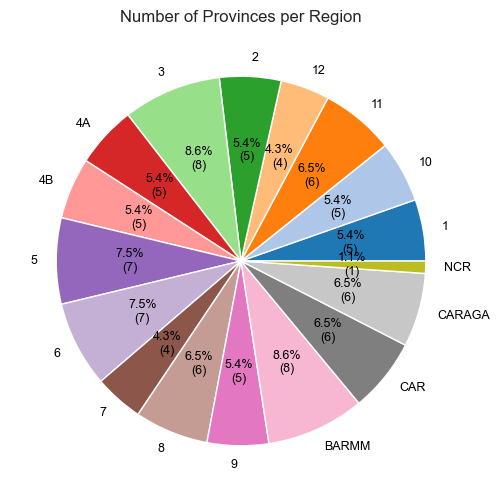

In [27]:
sns.set(style="whitegrid")

# 1. Province count per region (Pie chart with exact count + %)
province_count = standard_df.groupby('region_')['province_'].nunique()
print("\nProvince count per region:\n", province_count)

# Generate colors safely
colors = cm.tab20.colors[:len(province_count)]

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    province_count,
    labels=province_count.index,
    colors=colors,
    autopct=lambda p: f"{p:.1f}%\n({int(round(p*sum(province_count)/100))})",
    textprops={'fontsize': 9, 'color': 'black'}
)
plt.title("Number of Provinces per Region", fontsize=12)
plt.show()


Persons affected per region:
 region_
3         15558849.0
5          9829248.0
6          8667513.0
1          6363124.0
4A         6182754.0
8          4816719.0
7          4577785.0
NCR        2730661.0
BARMM      2496402.0
2          2485773.0
4B         2212341.0
CARAGA     1964496.0
CAR        1226900.0
12          859385.0
9           353763.0
11          279909.0
10          246536.0
Name: person_sum, dtype: float64


C:\Users\Rodney Lei Estrada\AppData\Local\Temp\ipykernel_476\3510998663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=person_region.index, y=person_region.values, palette="Blues_r")


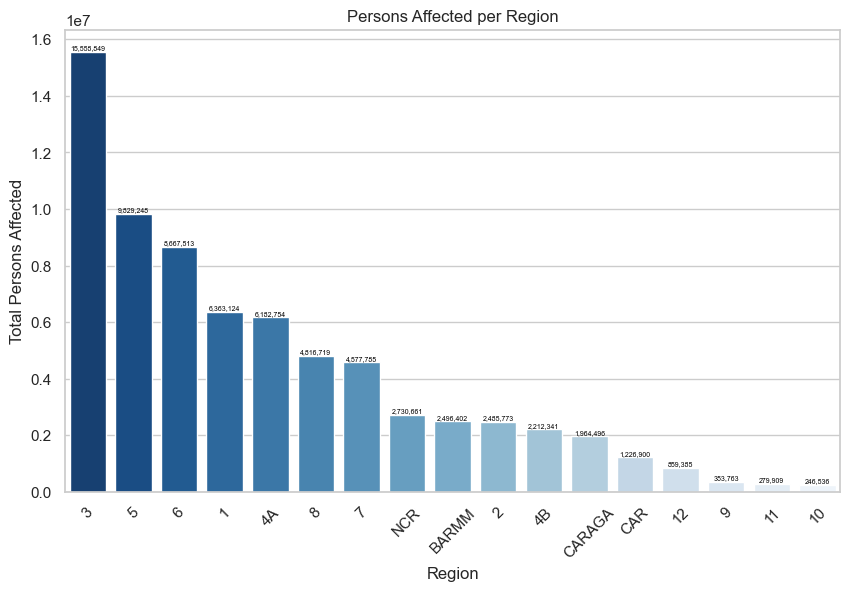

In [28]:
# 2. Persons affected per region (Bar chart, formatted numbers)
person_region = standard_df.groupby('region_')['person_sum'].sum().sort_values(ascending=False)
print("\nPersons affected per region:\n", person_region)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=person_region.index, y=person_region.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title('Persons Affected per Region')
plt.ylabel('Total Persons Affected')
plt.xlabel('Region')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=5, color='black')

plt.show()


Casualties per region:
          dead_sum  injured_ill_sum  missing_sum
region_                                        
1            35.0              3.0         10.0
10           10.0             34.0          0.0
11            5.0              1.0          1.0
12            3.0             17.0          0.0
2             9.0             31.0          2.0
3            15.0             82.0          0.0
4A           22.0              9.0          1.0
4B           48.0             21.0          8.0
5            25.0             47.0          1.0
6           119.0            175.0         15.0
7           214.0            547.0         32.0
8           181.0            414.0          6.0
9             7.0              1.0          0.0
BARMM        66.0            169.0         13.0
CAR          18.0            198.0          4.0
CARAGA       22.0            500.0          0.0
NCR           0.0              0.0          0.0


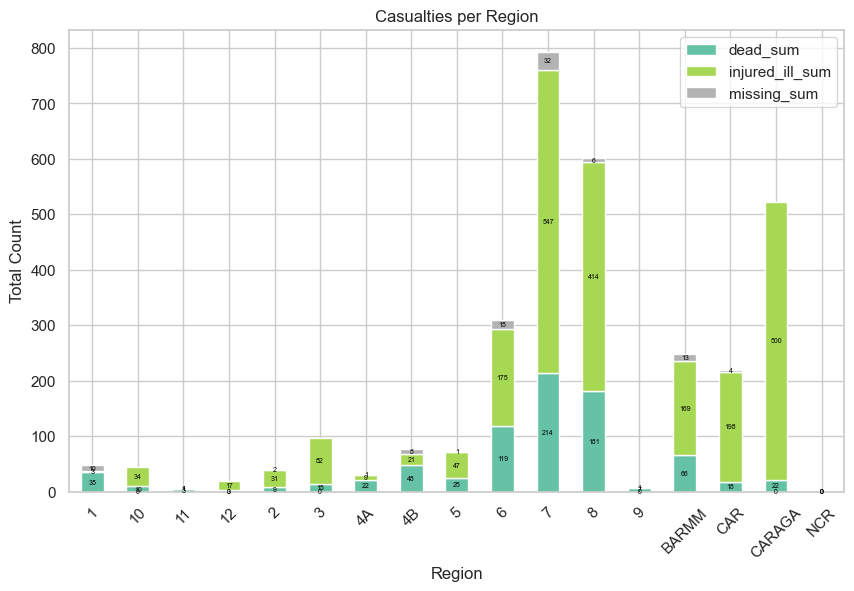

In [29]:
# 3. Casualties per region (Stacked Bar + labels)
casualties = standard_df.groupby('region_')[['dead_sum','injured_ill_sum','missing_sum']].sum()
print("\nCasualties per region:\n", casualties)

ax = casualties.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set2")
plt.title('Casualties per Region')
plt.ylabel('Total Count')
plt.xlabel('Region')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=5, color='black')

plt.show()


Top 15 provinces by number of typhoons:
 province_
BULACAN              31
CAGAYAN              31
ABRA                 29
MOUNTAIN PROVINCE    29
PAMPANGA             29
ZAMBALES             29
BENGUET              28
AURORA               28
ILOILO               27
ISABELA              27
Name: num_typhoons, dtype: int64


C:\Users\Rodney Lei Estrada\AppData\Local\Temp\ipykernel_476\4269437818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=typhoons.values, y=typhoons.index, palette="Reds_r")


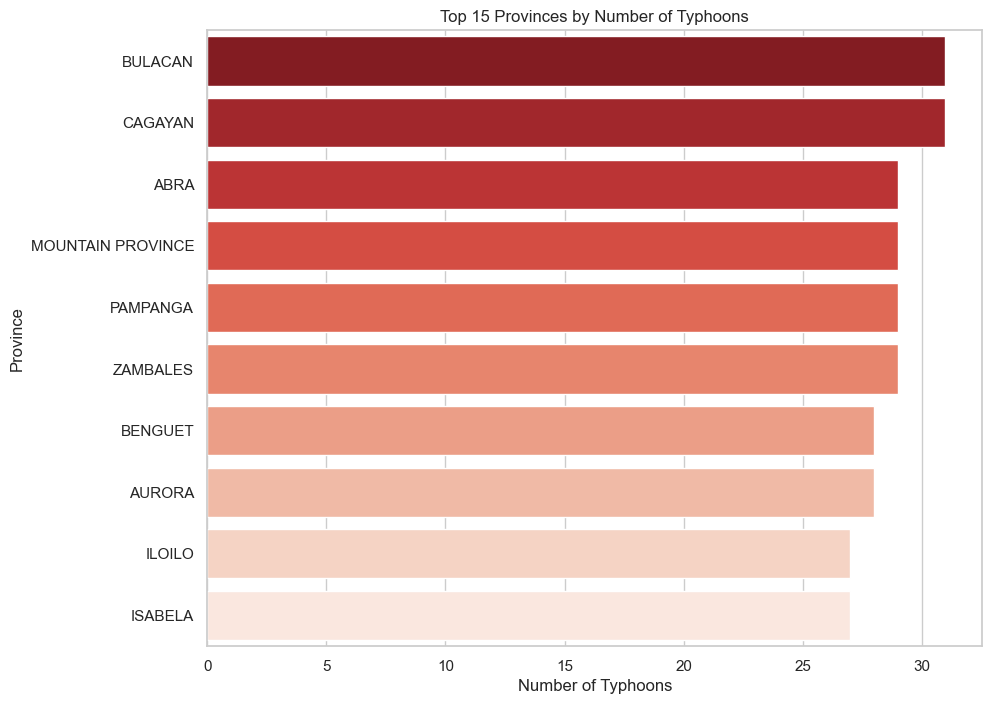

In [30]:
# 4. Top 15 Provinces by Number of Typhoons (Horizontal Bar)
typhoons = standard_df.groupby('province_')['num_typhoons'].max().sort_values(ascending=False).head(10)
print("\nTop 15 provinces by number of typhoons:\n", typhoons)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=typhoons.values, y=typhoons.index, palette="Reds_r")
plt.title('Top 15 Provinces by Number of Typhoons')
plt.xlabel('Number of Typhoons')
plt.ylabel('Province')
plt.show()


Aid/Support distribution per region:
          has_food_sum  has_cash_sum  has_hygiene_health_sum  \
region_                                                       
1                 158            12                      28   
10                 20             2                      10   
11                  7             3                       1   
12                 21            12                       3   
2                 350            32                      65   
3                 143             8                      15   
4A                 35            25                      20   
4B                195            14                      32   
5                 237            28                      11   
6                 542           321                      57   
7                 147             3                       0   
8                 154            37                      36   
9                  12             2                       3   
BARMM           

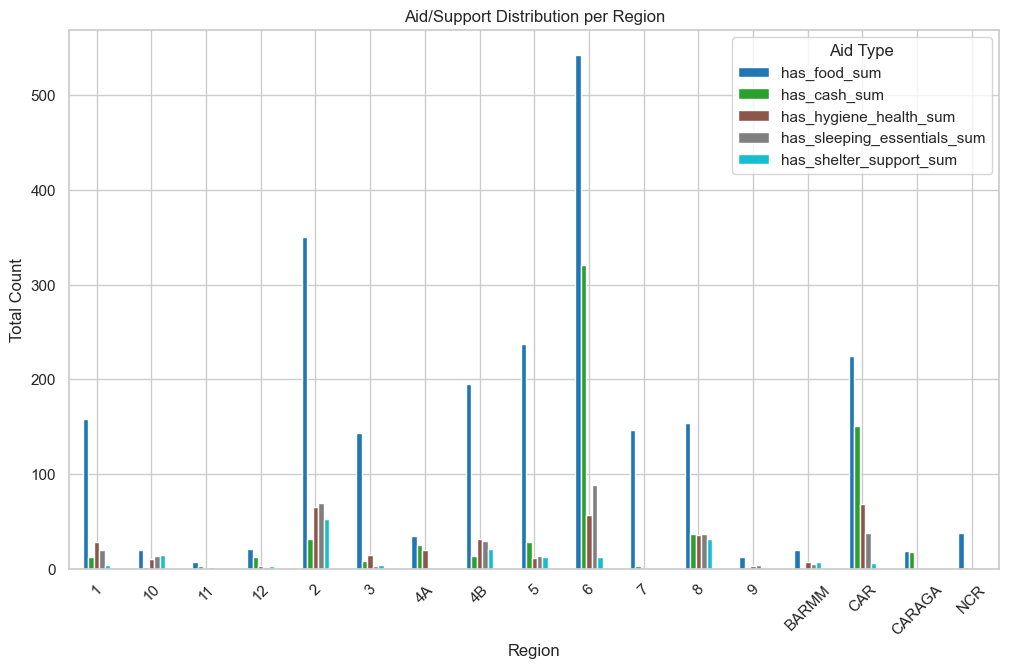

In [31]:
# 5. Aid/Support distribution per region (Grouped Bar)
aid = standard_df.groupby('region_')[['has_food_sum','has_cash_sum','has_hygiene_health_sum',
                                      'has_sleeping_essentials_sum','has_shelter_support_sum']].sum()
print("\nAid/Support distribution per region:\n", aid)

ax = aid.plot(kind='bar', figsize=(12, 7), colormap="tab10")
plt.title('Aid/Support Distribution per Region')
plt.ylabel('Total Count')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Aid Type')
plt.show()


Housing damage per region:
          totally_sum  partially_sum
region_                            
1            13898.0       157635.0
10             750.0         5987.0
11             425.0         2295.0
12             689.0         2741.0
2             3643.0        59089.0
3             1275.0         7718.0
4A           11879.0       113380.0
4B           22208.0       136926.0
5            59987.0       275794.0
6            59021.0       445374.0
7           245765.0       900987.0
8            61407.0       215707.0
9              524.0          786.0
BARMM         1345.0         1675.0
CAR            332.0         8136.0
CARAGA       67808.0       104093.0
NCR             20.0            0.0


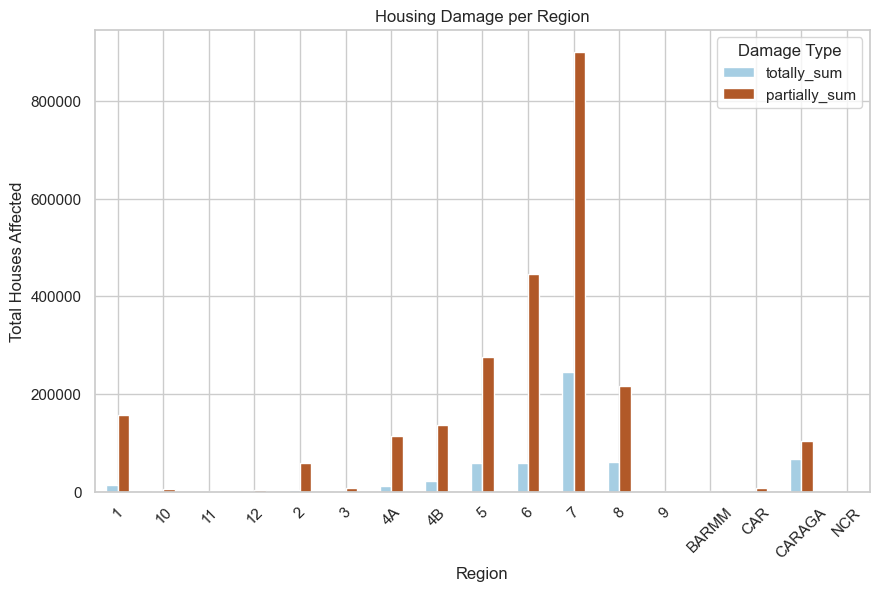

In [32]:
# 6. Housing damage per region (Grouped Bar)
damage = standard_df.groupby('region_')[['totally_sum','partially_sum']].sum()
print("\nHousing damage per region:\n", damage)

ax = damage.plot(kind='bar', figsize=(10, 6), colormap="Paired")
plt.title('Housing Damage per Region')
plt.ylabel('Total Houses Affected')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Damage Type')

plt.show()

In [33]:
# Get the total count of provinces
total_provinces = standard_df.shape[0]

# Get the total sum of families
total_families_sum = standard_df['families_sum'].sum()

# Get the total sum of people affected
total_person_sum = standard_df['person_sum'].sum()

# Print the results
print(f"Total number of provinces: {total_provinces}")
print(f"Total sum of families: {total_families_sum:,.0f}")
print(f"Total sum of people affected: {total_person_sum:,.0f}")

Total number of provinces: 93
Total sum of families: 18,693,326
Total sum of people affected: 70,852,158


In [34]:
standard_df.head()

,province_,region_,families_sum,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,...,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,first_year,last_year,num_reports,num_typhoons,recurrence_rate,cost_per_family
0,ABRA,CAR,191000.0,665436.0,2.0,115.0,0.0,58.0,888.0,2.946309e+07,...,46,8,4,4,2021,2025,17,29,5.800000,154.257011
1,AGUSAN DEL NORTE,CARAGA,45045.0,189625.0,0.0,0.0,0.0,2876.0,9376.0,2.032942e+07,...,0,0,0,0,2021,2025,7,9,1.800000,451.313549
2,AGUSAN DEL SUR,CARAGA,55722.0,221391.0,0.0,0.0,0.0,167.0,707.0,6.707485e+06,...,0,0,0,0,2021,2024,4,5,1.250000,120.374087
3,AKLAN,6,170922.0,637351.0,8.0,2.0,1.0,273.0,9530.0,6.632630e+07,...,35,1,3,0,2021,2025,13,22,4.400000,388.050105
4,ALBAY,5,620755.0,2402839.0,6.0,7.0,0.0,19277.0,105509.0,1.531597e+08,...,2,5,6,8,2020,2025,16,25,4.166667,246.731259
